# Introduction to Machine Learning: Regression
In this Jupyter Notebook, we will learn more about regression models in [scikit-learn](https://scikit-learn.org/stable/). We start with a simple linear regression using a small dataset and show how to visualize the relationship between the input feature and the target variable. We also discuss evaluating model performance using metrics such as mean squared error (MSE) or R-squared.

Later, we will look at polynomial regression and linear regression with more than one feature using [Auto MPG dataset](https://archive.ics.uci.edu/dataset/9/auto+mpg). We also discuss underfitting and overfitting and feature encoding.

Regression is a type of supervised machine learning algorithm used to predict a continuous numerical outcome variable based on one or more predictor variables. Individual observations are usually organized in a table format, where each row represents individual observations and the columns represent properties or features. This layout is referred to as Feature Matrix and is often contained in a NumPy `ndarray` or a Pandas `DataFrame` and will have a shape of `[n_samples, n_features]`. Feature matrix is often stored as `X`, while labels or target array is conventionally stored as `y`.

## Simple Linear Regression

In this exercise, we build a simple linear regression model using scikit-learn built-in tools. We drew inspiration for this exercise from [Simple Linear Regression](https://github.com/philippbauch/simple-linear-regression-notebook) exercise on Github, in which all functions needed for linear regression are developed from the ground-up in numpy. If you are interested in building your own linear regression program in Python, check it out.

We start with importing necessary libraries:


In [2]:
from IPython import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

We will import a dataset from a CSV (Comma-Separated Values) file with two columns. The first column represents the number of study hours by students, and the second column represents their corresponding exam grades.

There are multiple options for importing data in Python. `read_csv` in Pandas is a  powerfull tool for importing CSV files locally or from URLs.

In [3]:
column_names = ['Hours', 'Grades']
students = pd.read_csv('https://raw.githubusercontent.com/philippbauch/simple-linear-regression-notebook/master/data.csv', header=None, names=column_names)

# Shape of dataset
students.shape

# Info
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   100 non-null    float64
 1   Grades  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


With `read_csv`, we easily loaded data from a URL and created a pandas DataFrame. A DataFrame is a two-dimensional tabular data structure with labelled axes. To display the first few rows of a DataFrame, we use `.head()`.

In [4]:
students.head()

,Hours,Grades
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


Visualizing data always help us to understand the relationships between input features and targets. Here, number of hours is the only input feature and grades is the target. It is customary to use `X` for the independent variable, and `y` for the target variable.

---



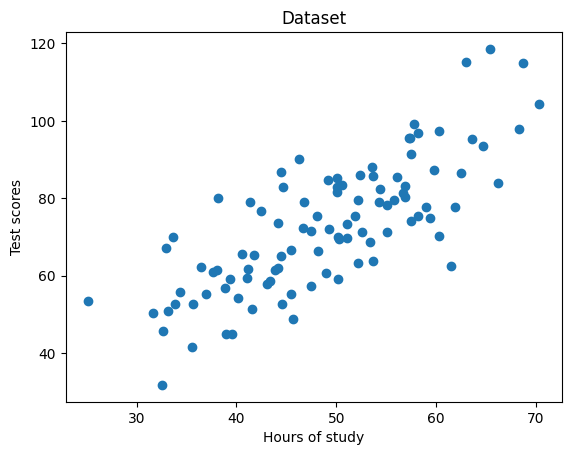

In [5]:
X = students[['Hours']]
y = students[['Grades']]

#Plot the dataset
plt.scatter(X,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

We split variables into training and testing sets, build the model on the training set, and evaluate it on the testing set using train_test_split from sklearn.model_selection. Commonly, data is randomly split into 80% training and 20% testing, but it can vary based on dataset size and the problem.

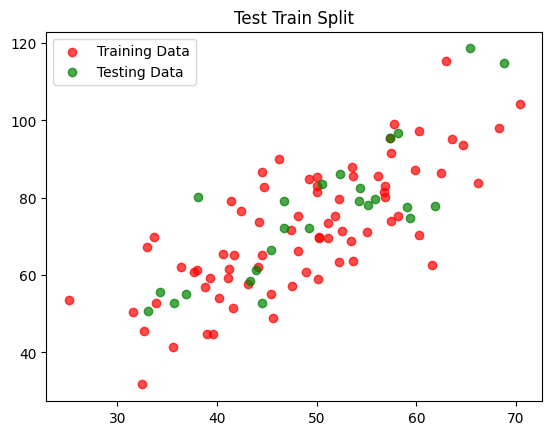

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

# Test train split visualization
plt.scatter(X_train,y_train, label='Training Data', color='r', alpha=0.7)
plt.scatter(X_test,y_test, label='Testing Data', color='g', alpha=0.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

Now, we can create an instance of `LinearRegression` class, which represents a linear regression model and train it by `X_train` and `y_train`. The training process involves finding the coefficients (slope and intercept) of the linear equation that minimizes the difference between the predicted values and the actual target values in the training dataset.

The training process involves adjusting the model's coefficients (slope and intercept) to minimize the difference between the predicted values and the actual target values in the training dataset. The difference between the predicted values and the actual target values in the training dataset is known as the "error" or "residual". The goal of training is to minimize the error. A cost function (or loss function) is defined, such as the Mean Squared Error (MSE), which quantifies how far off the model's predictions are from the true values.

An optimization algorithm like Gradient Descent is used to update the coefficients iteratively. Gradient Descent adjusts the coefficients in the direction that reduces the cost function. It calculates the gradients of the cost function with respect to the coefficients and updates them proportionally to the learning rate, a hyperparameter that controls the step size during optimization. The optimization process continues iteratively until a stopping criterion is met, such as a maximum number of iterations or the cost function reaching a predefined threshold. The model is considered trained when it converges.

The following figure illustrates simple linear regression:

![linear regression](https://files.realpython.com/media/fig-lin-reg.a506035b654a.png)

In [8]:
# Create linear regression object
LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(X=X_train, y=y_train)

LinearRegression()

With the trained model, predictions can be made for points in the testing data. Then, we can calculate the mean squared error (MSE) of the predictions made by the model. The mean squared error measures the average squared difference between the actual target values, `y_test`, and the predicted values, `predicted`. A lower MSE indicates better performance.

K-Fold Cross-Validation is one of the most common types of cross-validation used for assessing the performance of a model. It involves splitting the data randomly into K subsets (folds) of equal or near-equal size. Then, the model is trained on K-1 folds and evaluated on the remaining one (test set). This process is repeated K times, each time with a different fold as the test set and the other folds as the training set. The final performance metrics are then calculated as the average of the metrics obtained in each fold. K-Fold Cross Validation is widely used in machine learning when dealing with limited data or when the dataset is imbalanced.

The R-squared is a statistical measure that represents the proportion of the variance in the target variable that is predictable from the input features. It ranges from 0 to 1, where 1 indicates a perfect prediction and 0 indicates that the model does not explain any variance. A higher R-squared value suggests a better fit of the model to the data.

In [9]:
# Make predictions using the testing set
predicted = LR.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted))

Mean squared error: 105.91
Coefficient of determination: 0.65


In linear regression, the goal is to find the line that minimizes the difference between the actual data points and the predicted values on the line. The line of best fit is often represented by a linear equation of the form:

$$y = mx + b$$

where $y$ is the predicted value (the dependent variable) and $x$ is the input feature (the independent variable). Also, $m$ is the slope of the line and $b$ is the y-intercept. The line of best fit represents the best linear approximation of the relationship between the two variables.

Coefficients: 
 [[1.25206583]]
Intercept: 
 [10.76432426]


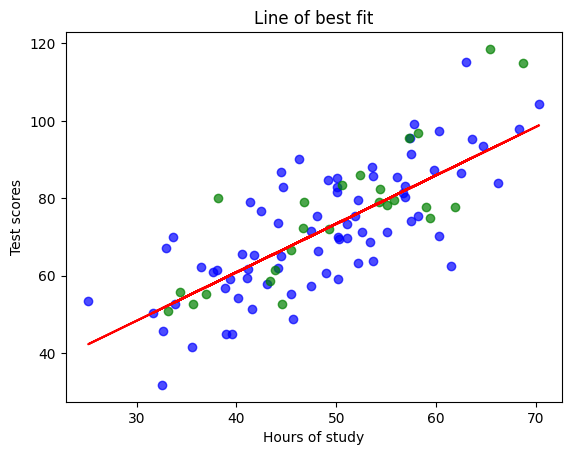

In [10]:
# The coefficients
print("Coefficients: \n", LR.coef_)
# The intercept
print("Intercept: \n", LR.intercept_)

# Visualizing the regression line
plt.scatter(X_train,y_train, label='Training Data', color='b', alpha=0.7)
plt.scatter(X_test,y_test, label='Testing Data', color='g', alpha=0.7)
plt.plot(X_train, LR.coef_*X_train + LR.intercept_, label='Linear Regression' , color='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

### Questions:

1. What is the average improvement in a student's score with an additional hour of study?
2. What is the best estimated score for a student who did not study at all?

## Polynomial Regerssion

Polynomial regression is a form of linear regression where the relationship between the input features (predictor variables) and the target variable (dependent variable) is modeled as an nth-degree polynomial. It extends the idea of simple linear regression, which uses a straight line to model the relationship, to fit a curve that can better capture complex patterns in the data.

In polynomial regression, the equation representing the relationship between the input features (X) and the target variable (y) takes the following form:

$$
y = \beta_0 + \beta_1 \times X + \beta_2 \times X^2 + \cdots + \beta_n \times X^n
$$

Where $y$ is the predicted value (the dependent variable), and $X$ is the input feature (the independent variable). $\beta_0$, $\beta_1$, $\beta_2$, $\cdots$, $\beta_n$ are the coefficients of the polynomial, representing the slopes of each term in the polynomial equation. $n$ is the degree of the polynomial, which determines how many powers of $X$ are included in the equation.

The goal of polynomial regression is to find the optimal values for the coefficients ($\beta_0$, $\beta_1$, $\beta_2$, $\cdots$, $\beta_n$) that minimize the difference between the predicted values and the actual target values in the training dataset. This is typically done using the method of least squares, which aims to minimize the sum of the squared differences between the actual and predicted values.

In the following example, we are going to use the classic [AutoMPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset to predict the horsepower of the late-1970s and early 1980s automobiles. To do this, we start with only a single attribute of the automobile, MPG. The following piece of code imports the database as a pandas DataFrame with column names as shown below:

In [11]:
from sklearn.preprocessing import PolynomialFeatures

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
auto_dataset = raw_dataset.dropna()

Now, take `MPG` as the input feature and `Horsepower` as the output feature, visualize their relationship using a scatter plot.

In [ ]:
X = # Write your code here
y = # Write your code here

#Plot the dataset
# Write your code here

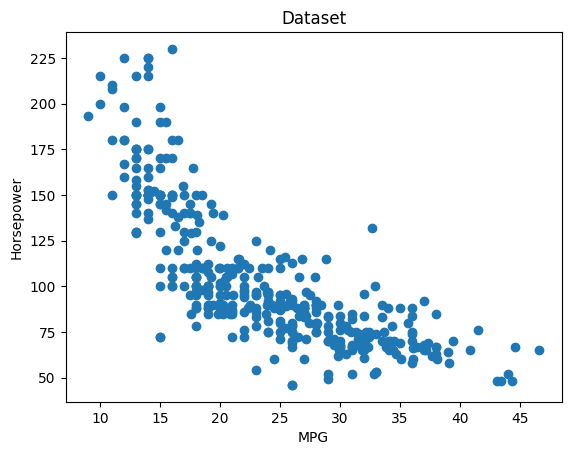

In [12]:
#@title
X = auto_dataset[['MPG']]
y = auto_dataset[['Horsepower']]

#Plot the dataset
plt.scatter(X,y)
plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('Dataset')
plt.show()

Split the data into training and test, train a linear regression model:

In [ ]:
# Write your code here

In [13]:
#@title
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

# Create linear regression object
LR2 = linear_model.LinearRegression()

# Train the model using the training sets
LR2.fit(X=X_train, y=y_train)

LinearRegression()

Now, evaluate the model with the test data and show the line of best fit:

In [ ]:
# Write your code here

Mean squared error: 696.41
Coefficient of determination: 0.52
Coefficients: 
 [[-3.88007348]]
Intercept: 
 [196.36659455]


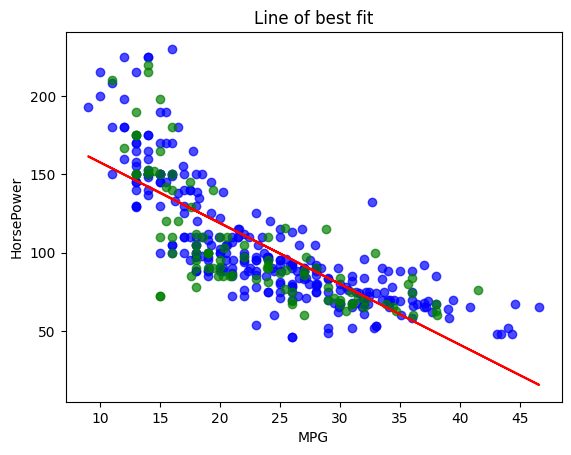

In [14]:
#@title
# Make predictions using the testing set
predicted = LR2.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted))

# The coefficients
print("Coefficients: \n", LR2.coef_)
# The intercept
print("Intercept: \n", LR2.intercept_)

# Visualizing the regression line
plt.scatter(X_train,y_train, label='Training Data', color='b', alpha=0.7)
plt.scatter(X_test,y_test, label='Testing Data', color='g', alpha=0.7)
plt.plot(X_train, LR2.coef_*X_train + LR2.intercept_, label='Linear Regression' , color='r')
plt.xlabel('MPG')
plt.ylabel('HorsePower')
plt.title('Line of best fit')
plt.show()

A better approximation can be obtained by training a nonlinear model, such as a polyomial regression. In scikit-learn, creating a polynomial regression model involves using the `PolynomialFeatures` class to transform the original input features into polynomial features, and then fitting these polynomial features with a linear regression model. Here's a step-by-step guide to building a polynomial regression model using scikit-learn:

In [17]:
# Create polynomial regression object
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

# Train the model using the training sets
X_poly = polynomial_features.fit_transform(X_train)

# Create and fit the linear regression model
PL = linear_model.LinearRegression()
PL.fit(X_poly, y_train)

LinearRegression()

Mean squared error: 527.19
Coefficient of determination: 0.64
Coefficients: 
 [[-12.86221656   0.17700751]]
Intercept: 
 [298.75718496]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


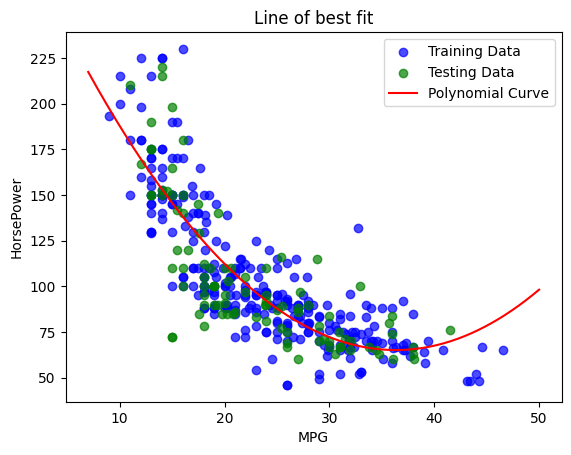

In [18]:
# Make predictions using the testing set
X_test_poly = polynomial_features.fit_transform(X_test)
PL_predicted = PL.predict(X_test_poly)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, PL_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, PL_predicted))

# The coefficients
print("Coefficients: \n", PL.coef_)
# The intercept
print("Intercept: \n", PL.intercept_)

# Visualizing the regression line
plt.scatter(X_train,y_train, label='Training Data', color='b', alpha=0.7)
plt.scatter(X_test,y_test, label='Testing Data', color='g', alpha=0.7)

X_curve = np.linspace(7, 50, 200).reshape(-1, 1)
X_curve_poly = polynomial_features.transform(X_curve)
y_curve = PL.predict(X_curve_poly)
plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')

plt.legend(loc="best")
plt.xlabel('MPG')
plt.ylabel('HorsePower')
plt.title('Line of best fit')
plt.show()

## Questions

Try using higher degree polynomials for your model, what happens to error?

![image](https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

## Underfitting

A machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data, i.e., it only performs well on training data but performs poorly on testing data. Underfitting usually happens when we have less data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the machine learning model are too easy and flexible to be applied to such minimal data, and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection. Underfitting also shows as low variance and high bias.

### Reasons for Underfitting

- The size of the training dataset used is not enough.
- The model is too simple.
- Training data is not cleaned and also contains noise in it.

### Techniques to Reduce Underfitting

- Increase model complexity.
- Increase the number of features, performing feature engineering.
- Remove noise from the data.
- Increase the number of epochs or increase the duration of training to get better results.

## Overfitting

A statistical model is said to be overfitted when the model does not make accurate predictions on testing data. When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees. Overfitting shows as low bias and high variance.

### Reasons for Overfitting:


- The model is too complex.
- The size of the training data.

### Techniques to Reduce Overfitting

- Increase (improve) training data.
- Reduce model complexity.
- Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
- Ridge Regularization and Lasso Regularization.

![image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*kADA5Q4al9DRLoXck6_6Xw.png)

## Regression Analysis with multiple input features


Including more features in the model can enhance its ability to learn underlying relationships, leading to improved accuracy. To begin, we visualize the relationships between the features. To obtain an overview of the distribution and basic statistics of the numerical data in the auto_dataset, use the `describe()` function.



In [ ]:
# Write your code here

In [19]:
#@title
auto_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In addition to using `describe()` to obtain an overview of the data distribution, central tendency, and range, we can further visualize the data by drawing histograms. Histograms provide a visual representation of the data's frequency distribution, allowing us to better understand the patterns. This additional visualization can offer valuable insights into the dataset's characteristics and aid in the data exploration process.

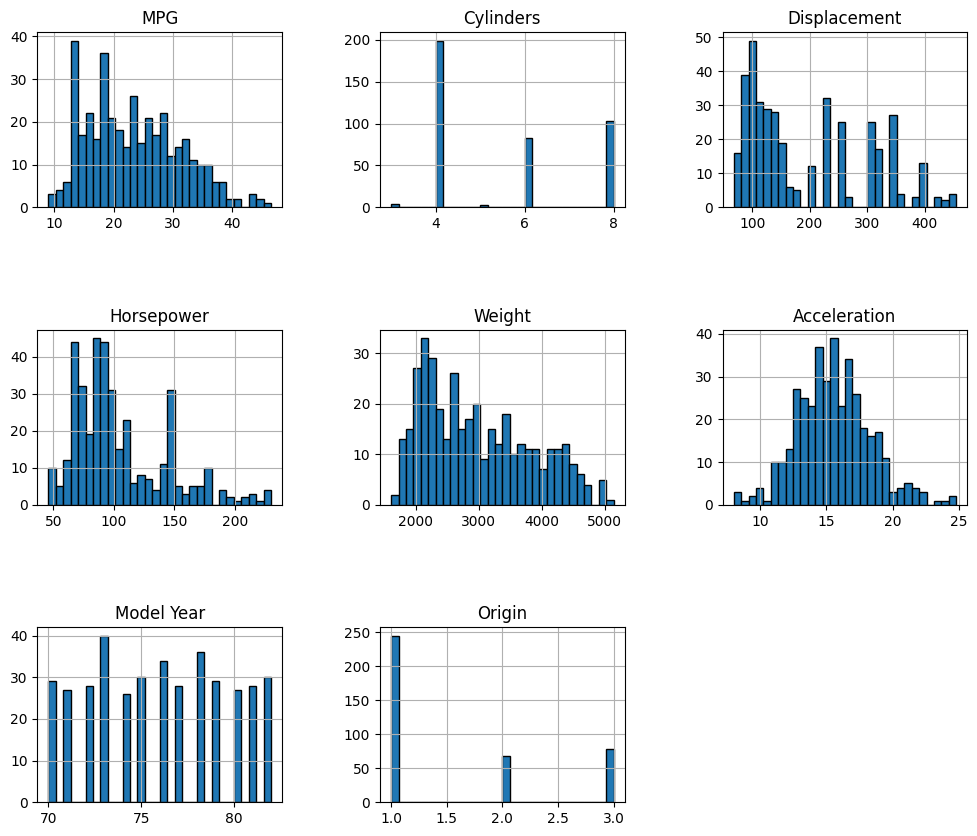

In [20]:
auto_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## Questions

Look at a few datapoints in `auto_dataset`, what is indicated by the column labeled `origin`?


It appears that "Origin" is a categorical variable that represents the location of manufacturing for cars. It is a discrete variable because it can only take specific values (1, 2, or 3) that correspond to different categories (America, Europe, and Asia/other).

These numerical codes help in representing the categorical information in a way that can be easily processed and used in various data analysis tasks. In some cases, it may be necessary to convert categorical variables into dummy variables (one-hot encoding) to use them in machine learning models that require numerical inputs.


The heatmap is another powerful tool for visualizing data correlation. By creating a heatmap for the `auto_dataset`, we can easily observe the interrelationship between different variables. For the heatmap, we are going to use another visulization library called `seaborn`.


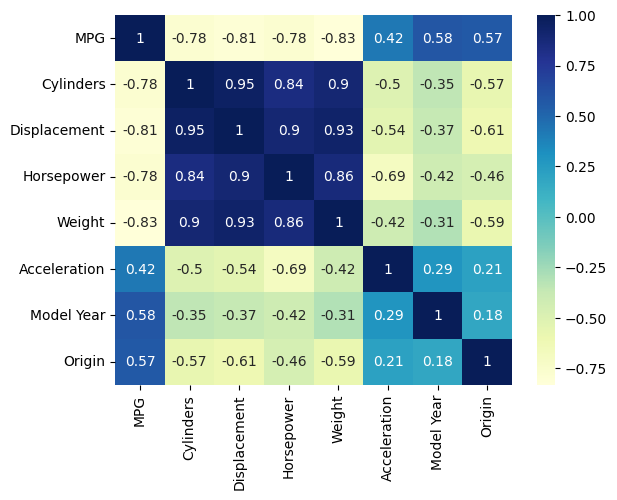

In [ ]:
# Visualizing the data using heatmap
import seaborn as sns
sns.heatmap(auto_dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

Now, lets remove `Horsepower` from input features and store it in `y` array as a target feature.

In [24]:
y = auto_dataset[['Horsepower']]
X = auto_dataset.drop('Horsepower', axis=1)

In [ ]:
# Train a linear regression model using X and y
X_train, X_test, ... # Write your code here

LR3 = # Write your code here
# Train LR3 with training data

# Print MSE and R2 score of LR3

In [25]:
#@title
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

# Create linear regression object
LR3 = linear_model.LinearRegression()

# Train the model using the training sets
LR3.fit(X=X_train, y=y_train)

# Make predictions using the testing set
LR3_pred = LR3.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, LR3_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, LR3_pred))

# The coefficients
print("Coefficients: \n", LR3.coef_)
# The intercept
print("Intercept: \n", LR3.intercept_)

Mean squared error: 153.66
Coefficient of determination: 0.89
Coefficients: 
 [[-0.43998421 -3.42195583  0.17487682  0.01889035 -3.96392332 -0.33417051
   4.63904221]]
Intercept: 
 [123.66001771]


There are lots of other regression model available in Scikit-learn and we can check them out to see which one improves the accuracy of our model.

- **Lasso Regression**: Lasso Regression adds an L1 regularization term to the loss function, which not only helps in handling multicollinearity but also performs feature selection by setting some coefficients to exactly zero, effectively excluding those features from the model.
- **Decision Tree Regression**: Decision Tree Regression models nonlinear relationships by dividing the feature space into regions and predicting the target variable based on the average or median of the target values within each region.
- **Random Forest Regression**: Random Forest Regression is an ensemble method that combines multiple decision trees to make more accurate predictions and reduce overfitting.
- **Gradient Boosting Regression**: Gradient Boosting Regression is another ensemble method that builds multiple weak learners (typically decision trees) sequentially, with each tree attempting to correct the errors of the previous ones, leading to better predictive performance.

## Question

Build abovementioned models in Scikit-learn and compare their performance:

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Create the Decision Tree Regressor with desired hyperparameters
# max_depth: Maximum depth of the tree (you can adjust this value based on your data) - use 5
# random_state: Seed for random number generator to ensure reproducibility
dt_regressor = # Write your code here
dt_regressor.fit(X_train, y_train)
y_pred_dt = # Write your code here
mse_dt = # Write your code here
r2_dt = # Write your code here


# Create the Random Forest Regressor with desired hyperparameters
# n_estimators: Number of trees in the forest (you can adjust this value based on your data) - use 100
# max_depth: Maximum depth of the individual trees (you can adjust this value based on your data) - use 5
# random_state: Seed for random number generator to ensure reproducibility

# Write your code here


# Create the Gradient Boosting Regressor with desired hyperparameters
# n_estimators: Number of boosting stages (you can adjust this value based on your data) - use 100
# max_depth: Maximum depth of individual trees (you can adjust this value based on your data) - use 3
# learning_rate: Shrinkage parameter to control the contribution of each tree (you can adjust this value based on your data) - use 0.1
# random_state: Seed for random number generator to ensure reproducibility

# Write your code here

In [33]:
#@title
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Create the Decision Tree Regressor with desired hyperparameters
# max_depth: Maximum depth of the tree (you can adjust this value based on your data)
# random_state: Seed for random number generator to ensure reproducibility
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


# Create the Random Forest Regressor with desired hyperparameters
# n_estimators: Number of trees in the forest (you can adjust this value based on your data)
# max_depth: Maximum depth of the individual trees (you can adjust this value based on your data)
# random_state: Seed for random number generator to ensure reproducibility
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create the Gradient Boosting Regressor with desired hyperparameters
# n_estimators: Number of boosting stages (you can adjust this value based on your data)
# max_depth: Maximum depth of individual trees (you can adjust this value based on your data)
# learning_rate: Shrinkage parameter to control the contribution of each tree (you can adjust this value based on your data)
# random_state: Seed for random number generator to ensure reproducibility
gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

<ipython-input-33-bb3ce536be0b>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Use the following piece of code to compare these four methods:

In [37]:
# Print the results
print("Mean Squared Error - Lasso Regression: %.2f" % mse_lasso)
print("Coefficient of determination (R-squared) - Lasso Regression: %.2f" % r2_lasso)

print("Mean Squared Error - Decision Tree Regression: %.2f" % mse_dt)
print("Coefficient of determination (R-squared) - Decision Tree Regression: %.2f" % r2_dt)

print("Mean Squared Error - Random Forest Regression: %.2f" % mse_rf)
print("Coefficient of determination (R-squared) - Random Forest Regression: %.2f" % r2_rf)

print("Mean Squared Error - Gradient Boost Regression: %.2f" % mse_gb)
print("Coefficient of determination (R-squared) - Gradient Boost Regression: %.2f" % r2_gb)

Mean Squared Error - Lasso Regression: 154.16
Coefficient of determination (R-squared) - Lasso Regression: 0.89
Mean Squared Error - Decision Tree Regression: 130.03
Coefficient of determination (R-squared) - Decision Tree Regression: 0.91
Mean Squared Error - Random Forest Regression: 110.57
Coefficient of determination (R-squared) - Random Forest Regression: 0.92
Mean Squared Error - Gradient Boost Regression: 126.97
Coefficient of determination (R-squared) - Gradient Boost Regression: 0.91


There are numerous other tutorials and examples for regression analysis on Kaggle and GitHub. For another example, take a look at the [California Housing example](https://colab.research.google.com/github/ubc-library-rc/intro-machine-learning/blob/main/machine-learning-examples.ipynb#scrollTo=de60c08d-887f-4e37-b681-d9d5672218a3
).